# Transformada de Hough

O Objetivo dessa aula é:

1. Entender o conceito da transforma de hough.
2. Como usa-la para detecção de linhas em uma imagem.



# Teoria

Hough Transform é uma técnica popular para detectar qualquer forma, se você puder representar essa forma na forma matemática. Ele pode detectar a forma mesmo se ela estiver quebrada ou distorcida um pouco. Vamos ver como funciona para uma linha.

Uma linha pode ser representada como y = mx + c ou em forma paramétrica, como $ \rho = x \cos \theta + y \sin \theta $  Onde $\rho$ é a distância perpendicular da origem até a linha, e $\theta $ é o ângulo formado por essa linha perpendicular e o eixo horizontal medido no sentido anti-horário (essa direção varia de acordo com a representação do sistema de coordenadas. Essa representação é usada no OpenCV). Confira abaixo a imagem:

![alt text](https://docs.opencv.org/3.0-beta/_images/houghlines1.svg "Logo Title Text 1")

[logo]: https://docs.opencv.org/3.0-beta/_images/houghlines1.svg "Logo Title Text 2"


Portanto, se a linha estiver passando abaixo da origem, ela terá um rho e ângulo positivos menores que 180. Se estiver acima da origem, em vez de ter um ângulo maior que 180, o ângulo será menor que 180 e rho será considerado negativo. Qualquer linha vertical terá 0 grau e as linhas horizontais terão 90 graus.

Agora vamos ver como o Hough Transform funciona para linhas. Qualquer linha pode ser representada nestes dois termos, ($\rho, \theta$) . Então, primeiro, ele cria um array 2D ou um acumulador (para manter valores de dois parâmetros) e é definido como 0 inicialmente. Deixar linhas denotam o $\rho$ e colunas denotam o $\theta$ . O tamanho da matriz depende da precisão que você precisa. Suponha que você queira que a precisão dos ângulos seja de 1 grau, você precisa de 180 colunas. Para $\rho$ , a distância máxima possível é o comprimento diagonal da imagem. Então, tendo uma precisão de pixel, o número de linhas pode ser o comprimento diagonal da imagem.

Considere uma imagem 100x100 com uma linha horizontal no meio. Tome o primeiro ponto da linha. Você sabe seus valores (x, y). Agora na equação da linha, coloque os valores \ theta = 0,1,2, ...., 180 e verifique o $\rho$ você consegue. Para cada ($\rho, \theta$) par, você incrementa o valor por um em nosso acumulador em seu correspondente ($\rho, \theta$) células Então agora no acumulador, a célula (50,90) = 1 junto com algumas outras células.

Agora pegue o segundo ponto na linha. Faça o mesmo que acima. Incrementar os valores nas células correspondentes a ($\rho, \theta$) você tem. Desta vez, a célula (50,90) = 2. O que você realmente faz é votar no ($\rho, \theta$) valores. Você continua esse processo para todos os pontos da linha. Em cada ponto, a célula (50,90) será incrementada ou votada, enquanto outras células podem ou não ser votadas. Desta forma, no final, a célula (50,90) terá votos máximos. Então, se você procurar no acumulador por votos máximos, você obtém o valor (50,90) que diz que há uma linha nesta imagem na distância 50 da origem e no ângulo de 90 graus. É bem mostrado na animação abaixo (Imagem Cortesia: Amos Storkey ) 

![alt text](https://docs.opencv.org/3.0-beta/_images/houghlinesdemo.gif "Logo Title Text 1")

[logo]: https://docs.opencv.org/3.0-beta/_images/houghlinesdemo.gif "Logo Title Text 2"

É assim que o transformador de linhas trabalha. É simples e pode ser que você possa implementá-lo usando o Numpy por conta própria. Abaixo está uma imagem que mostra o acumulador. Pontos brilhantes em alguns locais indicam que são os parâmetros de possíveis linhas na imagem. (Imagem cedida por: Wikipedia )

![alt text](https://docs.opencv.org/3.0-beta/_images/houghlines2.jpg "Logo Title Text 1")

[logo]: https://docs.opencv.org/3.0-beta/_images/houghlines2.jpg "Logo Title Text 2"



Importando as bibliotecas e lendo a imagem

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('estrada.jpg')

Convertendo para tons de cinza e aplicando a detecção de bordas por canny

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 70, 255)

Na transformação hough é preciso muita computação. A Transformação Hough Probabilística é uma otimização da Transformação Hough que foi comentada na aula. 

Essa função não leva todos os pontos em consideração, em vez disso, leva apenas um subconjunto aleatório de pontos e isso é suficiente para a detecção de linha. 

FUNÇÃO **HoughLinesP(img, ρ, θ, minVal, maxVal)**

Entrada:  
        1. img = Imagem com a qual queremos trabalhar binária.
        2. ρ = distância perpendicular da origem até a linha.
        3. θ = ângulo perpendicular da linha ao eixo.
        4. minVal =  comprimento mínimo da linha. Segmentos de linha mais curtos do que isso são rejeitados.
        5. maxVal = comprimento máximo da linha.
Saída:

        1. Imagem com bordas detectadas.


In [3]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, 200)

Desenhar as linhas detectadas

FUNÇÃO **line(img, coord1, coord2, cor, lag)**

Entrada:  
        1. img = Imagem com a qual queremos trabalhar binária.
        2. coord1 = coordenadas iniciais.
        3. coord2 = coordenadas finais.
        4. cor =  cor da linha.
        5. lag = grossura da linha.
Saída:

        1. linha desenhada


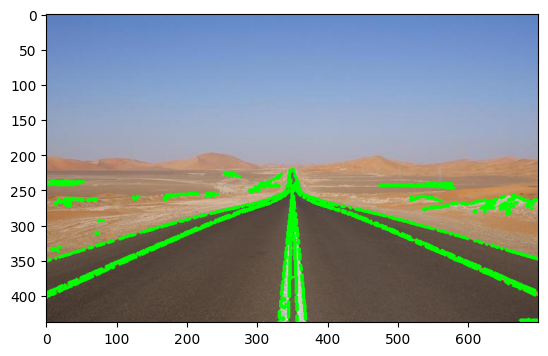

In [19]:
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1,y1),(x2,y2), (0,255,0),3)
    
fig, axes = plt.subplots(1, figsize=(10, 4))

axes.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))